In [11]:
# basic tools
import os
import glob
import math
import re

# basic tools for ML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import Model
from prophet import Prophet
import plotly as go

### 데이터프레임 생성

In [3]:
from preprocess.consumption import UserConsumption

User = UserConsumption('data/private/PowerConsumption/')    # prophet.py 파일 기준으로 상대경로 입력
user_consumption = User.concat_dataframes()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Empty DataFrame

In [4]:
# # PUBlIC 

# probhet_df = mean_change.reset_index()
# probhet_df.columns = ['ds','y']
# probhet_df['ds'] = pd.to_datetime(probhet_df['ds'])
# m = Prophet() 
# m.fit(probhet_df)
# # public data 예측 
# public_probhet_df = pd.DataFrame()
# public_probhet_df['ds'] = ['2021-11-01','2021-11-02','2021-11-03','2021-11-04','2021-11-05']
# public_probhet_df['ds'] = pd.to_datetime(public_probhet_df['ds'])
# public_result = m.predict(public_probhet_df)

In [5]:
user_consumption.corr()

,전기,수도,온수,가스,열량
전기,1.000000,0.651311,0.357623,0.231070,-0.061119
수도,0.651311,1.000000,0.591108,0.305473,0.016980
온수,0.357623,0.591108,1.000000,0.253283,0.279016
가스,0.231070,0.305473,0.253283,1.000000,0.134379
열량,-0.061119,0.016980,0.279016,0.134379,1.000000


In [6]:
len(user_consumption)

1461

In [7]:
# https://dacon.io/competitions/official/235720/codeshare/2492?page=4&dtype=recent
leng = len(user_consumption)    # 1461
periods = 30

prophet_df = pd.DataFrame({'ds':user_consumption['datetime'].iloc[:leng-30],
                            'y':user_consumption['전기'].iloc[:leng-30]
})

display(prophet_df.info())
display(prophet_df.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1431 entries, 0 to 1430
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1431 non-null   datetime64[ns]
 1   y       1431 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 22.5 KB


None

,ds,y
0,2021-01-01,17.9
1,2021-01-02,11.5
2,2021-01-03,15.1


- 모델링 도움: https://hyperconnect.github.io/2020/03/09/prophet-package.html

In [8]:
# 모델 설정
model_prophet = Prophet()
# 훈련
loss = model_prophet.fit(prophet_df)
# 예측용 데이터 프레임 만들기
df_pred = model_prophet.make_future_dataframe(periods=periods)
# 예측
predict = model_prophet.predict(df_pred)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/opt/homebrew/Caskroom/miniforge/base/envs/ds-py39/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/Caskroom/miniforge/base/envs/ds-py39/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/Caskroom/miniforge/base/envs/ds-py39/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.57961
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      72       3525.11   4.57828e-05       78.8366   4.281e-07       0.001      133  LS failed, Hessian reset 
      99       3525.12    1.4543e-07       69.9634      0.3339           1      170   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     103       3525.12   1.63986e-07       66.2317      0.3175           1      176   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


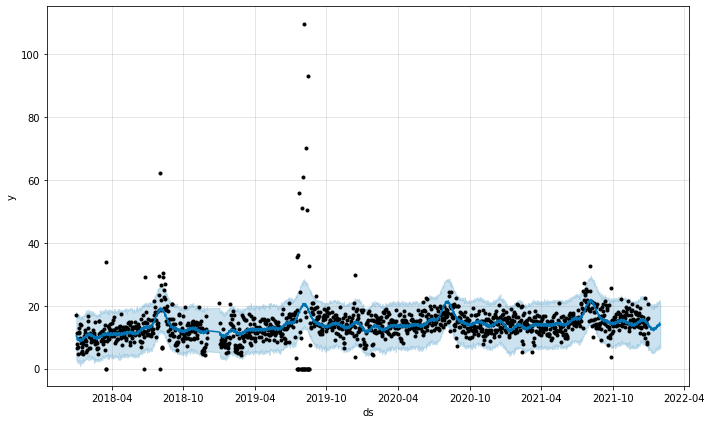

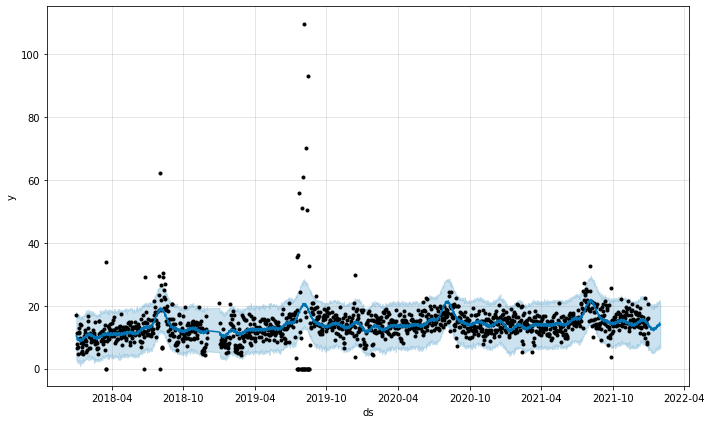

In [17]:
model_prophet.plot(predict)

/opt/homebrew/Caskroom/miniforge/base/envs/ds-py39/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/Caskroom/miniforge/base/envs/ds-py39/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


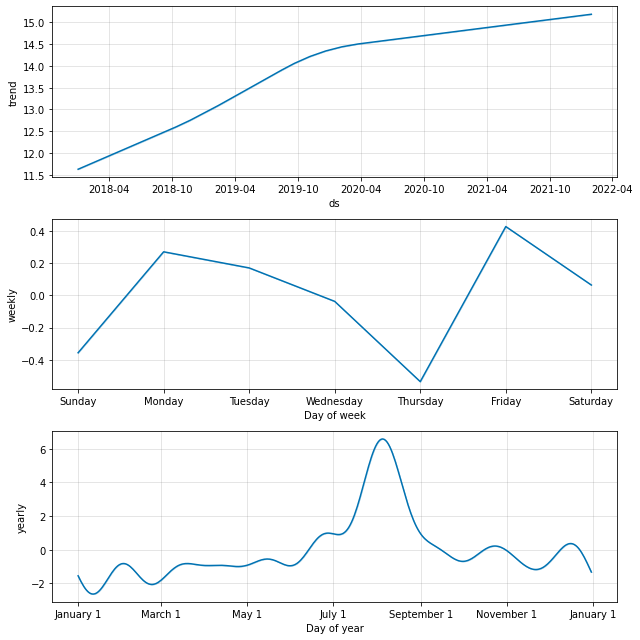

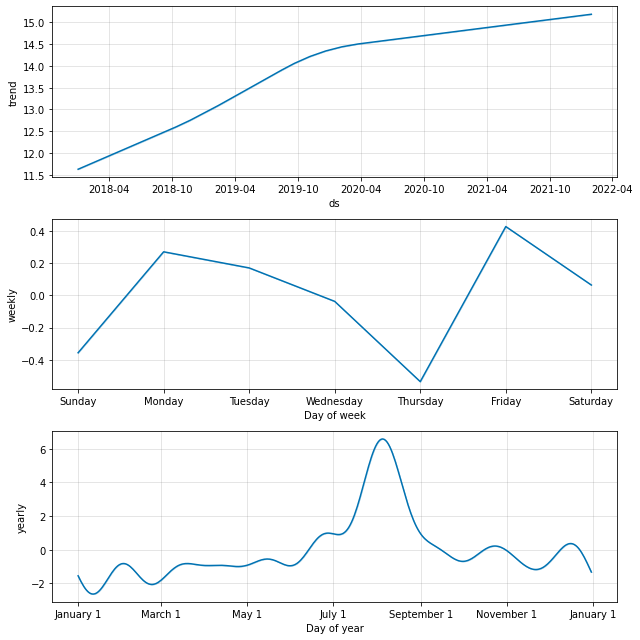

In [19]:
model_prophet.plot_components(predict)

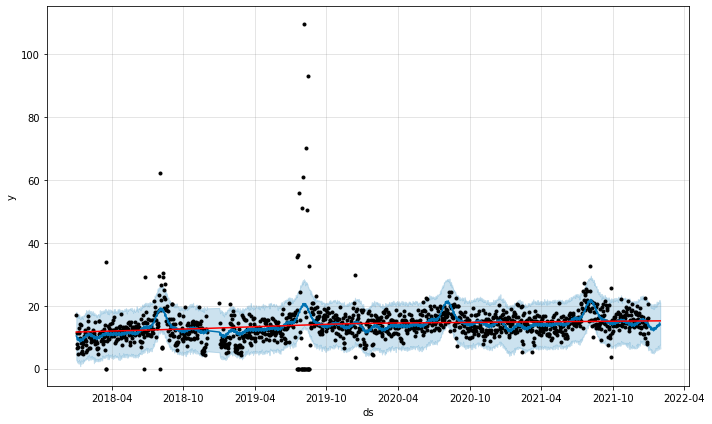

In [20]:
# 변화지점 확인
from prophet.plot import add_changepoints_to_plot

fig = model_prophet.plot(predict)
a = add_changepoints_to_plot(fig.gca(), model_prophet, predict)